In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [4]:
#read data
data=pd.read_csv("./cwurData.csv")

In [7]:
data

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [8]:
#see if there is missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [9]:
#broad_impact has missiong value, so drop it
data=data.drop("broad_impact",axis=1)

In [10]:
#count the quantity of universities in each country
data["country"].value_counts()

USA                     573
China                   167
Japan                   159
United Kingdom          144
Germany                 115
France                  109
Italy                    96
Spain                    81
Canada                   72
South Korea              72
Australia                58
Taiwan                   46
Brazil                   36
India                    31
Netherlands              29
Switzerland              26
Austria                  24
Sweden                   24
Israel                   22
Belgium                  20
Turkey                   20
Finland                  20
Poland                   18
Ireland                  16
Iran                     16
Greece                   14
Portugal                 14
Norway                   12
Hungary                  12
New Zealand              12
Denmark                  12
Hong Kong                12
South Africa             10
Czech Republic           10
Russia                    9
Saudi Arabia        

In [11]:
#Encode the country column with mean value
country_df=data.groupby("country",as_index=None)["score"].mean()

In [12]:
country_df=country_df.rename({'score':'country_score'},axis=1)

In [13]:
country_df

,country,country_score
0,Argentina,44.672857
1,Australia,45.825517
2,Austria,45.139583
3,Belgium,47.011000
4,Brazil,44.781111
5,Bulgaria,44.335000
6,Canada,47.359306
7,Chile,44.767500
8,China,44.992575
9,Colombia,44.432500


In [14]:
#add country score column
data=data.merge(country_df,on="country",how="left")

In [15]:
data

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year,country_score
0,1,Harvard University,USA,1,7,9,1,1,1,1,5,100.00,2012,51.839860
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,1,91.67,2012,51.839860
2,3,Stanford University,USA,3,17,11,5,4,2,2,15,89.50,2012,51.839860
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,50,86.17,2012,49.474653
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,18,85.21,2012,51.839860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,816,44.03,2015,45.095000
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,871,44.03,2015,44.230000
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,824,44.03,2015,44.781111
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,651,44.02,2015,44.990864


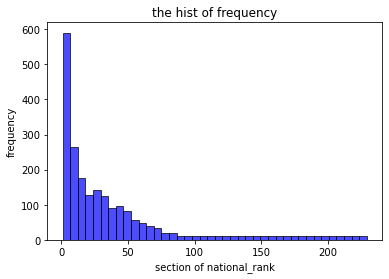

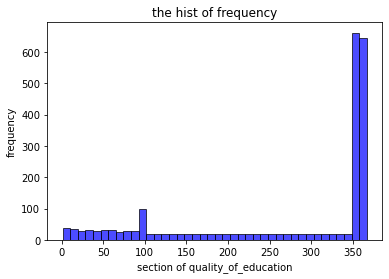

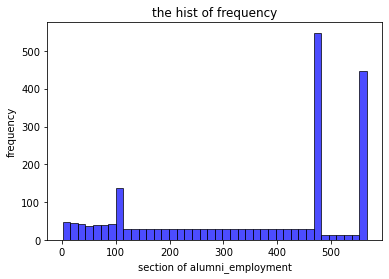

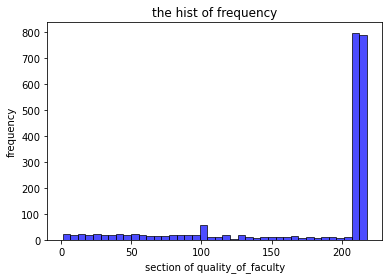

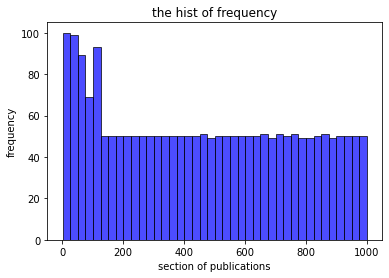

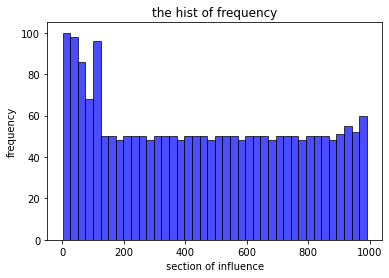

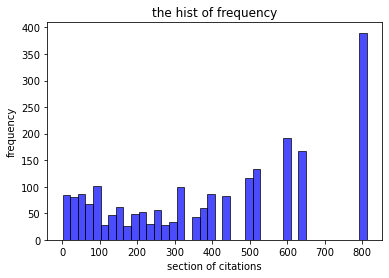

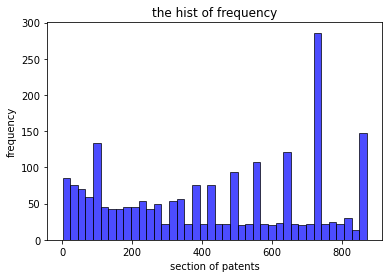

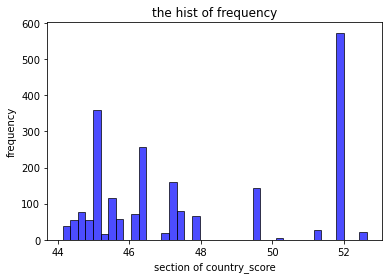

In [16]:
#plot the distribution
con_cols=['national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'patents',"country_score"]
for c in con_cols:
    plt.hist(data[c], bins=40, facecolor="blue", edgecolor="black", alpha=0.7)

    plt.xlabel("section of "+c)
    
    plt.ylabel("frequency")

    plt.title("the hist of frequency")
    plt.show()

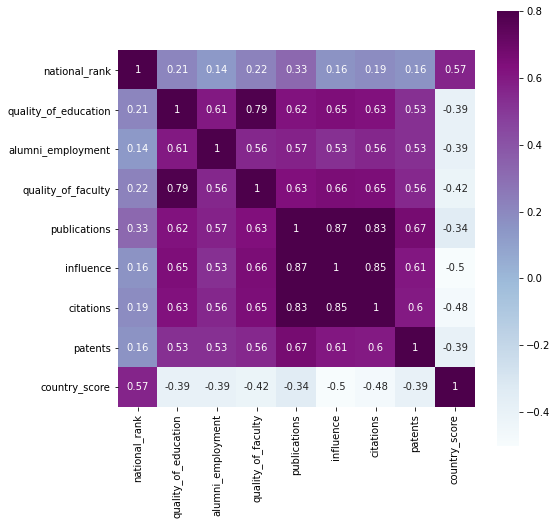

In [17]:
#plot coefficient matrix
matrix = data[con_cols].corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(matrix,vmax=.8, square=True,cmap="BuPu",annot=True);

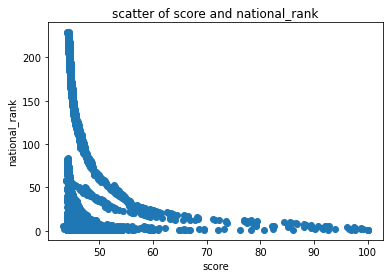

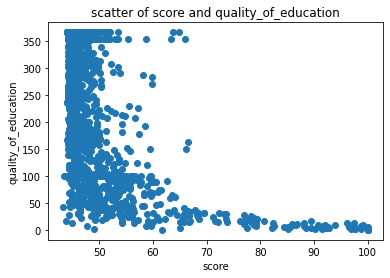

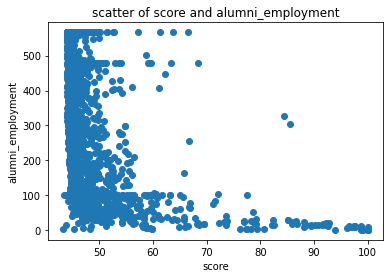

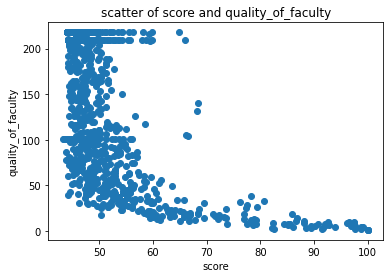

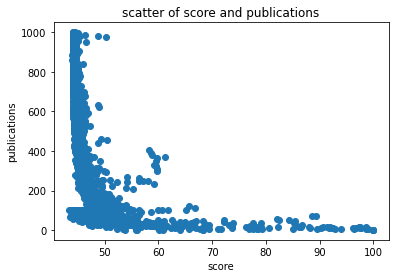

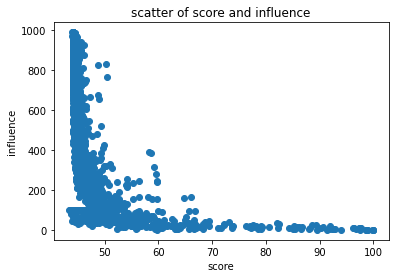

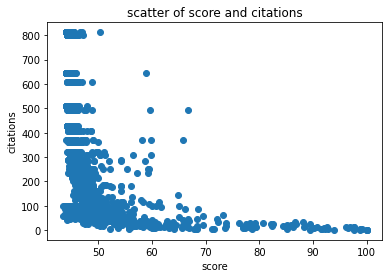

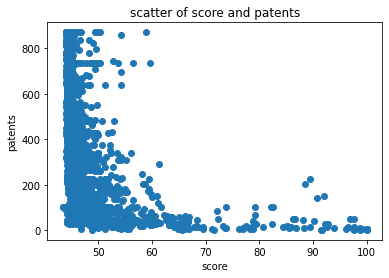

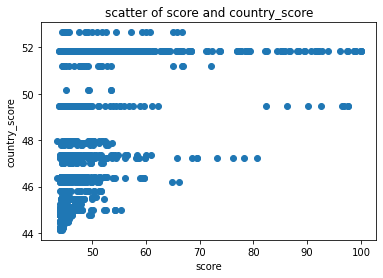

In [18]:
#plot scatter for parameter and variable
for c in con_cols:
    plt.scatter(data["score"],data[c])

    plt.xlabel("score")

    plt.ylabel(c)

    plt.title("scatter of score and "+c)
    plt.show()

In [19]:
#split the data
train_x, test_x, train_y, test_y = train_test_split(data[con_cols],data["score"] ,test_size=0.2, random_state=42)

In [20]:
#build linear regression mode
lr=LinearRegression()
lr.fit(train_x,train_y)
pre_lr=lr.predict(test_x)

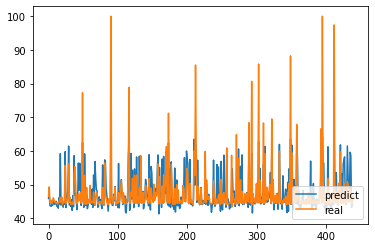

In [21]:
#plot
x=[i for i in range(len(pre_lr))]
plt.plot(x, pre_lr)
plt.plot(x, test_y)
plt.legend(labels=['predict','real'],loc='lower right')

In [23]:
#calculate MSE，R2
print("linear regression R2=",(r2_score(test_y,pre_lr)))
print("linear regression MSE=",(mean_squared_error(test_y,pre_lr)))

linear regression R2= 0.48410017907209524
linear regression MSE= 27.78567848448547


In [24]:
lr.coef_

array([-0.02966522, -0.00301383, -0.00449595, -0.05874648, -0.00066946,
        0.0009923 ,  0.00091285, -0.0007952 ,  0.62280366])

In [25]:
lr.intercept_

32.00946666148729

In [27]:
#build decision tree regression mode
dt=DecisionTreeRegressor(max_depth=9)
dt.fit(train_x,train_y)
pre_dt=dt.predict(test_x)

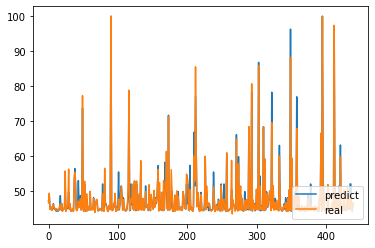

In [28]:
#plot
x=[i for i in range(len(pre_dt))]
plt.plot(x, pre_dt)
plt.plot(x, test_y)
plt.legend(labels=['predict','real'],loc='lower right')

In [29]:
#calculate MSE，R2
print("decision tree regression R2=",(r2_score(test_y,pre_dt)))
print("decision tree regression MSE=",(mean_squared_error(test_y,pre_dt)))

decision tree regression R2= 0.932690500602832
decision tree regression MSE= 3.625200151916195


In [30]:
dt.feature_importances_

array([0.00495747, 0.08220883, 0.04350487, 0.67909156, 0.01801702,
       0.10152607, 0.06209361, 0.00768846, 0.00091212])

In [31]:
#random forest
rf=RandomForestRegressor(max_depth=10,n_estimators=20)
rf.fit(train_x,train_y)
pre_rf=rf.predict(test_x)

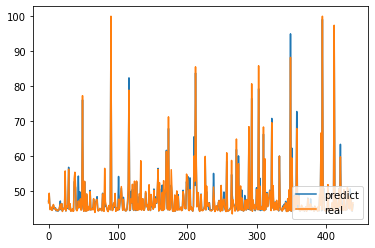

In [32]:
x=[i for i in range(len(pre_rf))]
plt.plot(x, pre_rf)
plt.plot(x, test_y)
plt.legend(labels=['predict','real'],loc='lower right')

In [33]:
print("random forest R2=",(r2_score(test_y,pre_rf)))
print("random forest MSE=",(mean_squared_error(test_y,pre_rf)))

random forest R2= 0.9690846987263311
random forest MSE= 1.6650570257926358


In [34]:
rf.feature_importances_

array([0.00711524, 0.03951737, 0.05441823, 0.71583517, 0.06667325,
       0.06691677, 0.04155729, 0.00721083, 0.00075585])

In [35]:
#gradient boosting tree
dbt=GradientBoostingRegressor()
dbt.fit(train_x,train_y)
pre_gbt=dbt.predict(test_x)

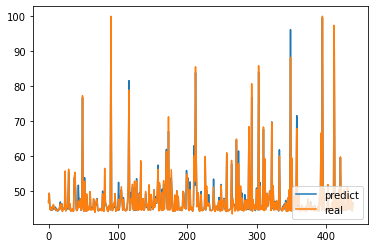

In [36]:
x=[i for i in range(len(pre_gbt))]
plt.plot(x, pre_gbt)
plt.plot(x, test_y)
plt.legend(labels=['predict','real'],loc='lower right')

In [37]:
print("gradient boosting tree R2=",(r2_score(test_y,pre_gbt)))
print("gradient boosting tree MSE=",(mean_squared_error(test_y,pre_gbt)))

gradient boosting tree R2= 0.9817605907434298
gradient boosting tree MSE= 0.9823503339049054


In [38]:
dbt.feature_importances_

array([1.33104592e-03, 1.00168683e-01, 7.65240539e-02, 6.58539699e-01,
       5.10798757e-02, 5.81509559e-02, 4.20769824e-02, 1.19376941e-02,
       1.91010589e-04])